In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

# Load data

In [2]:
df = pd.read_csv('../data/benin-malanville.csv')

In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


 # Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

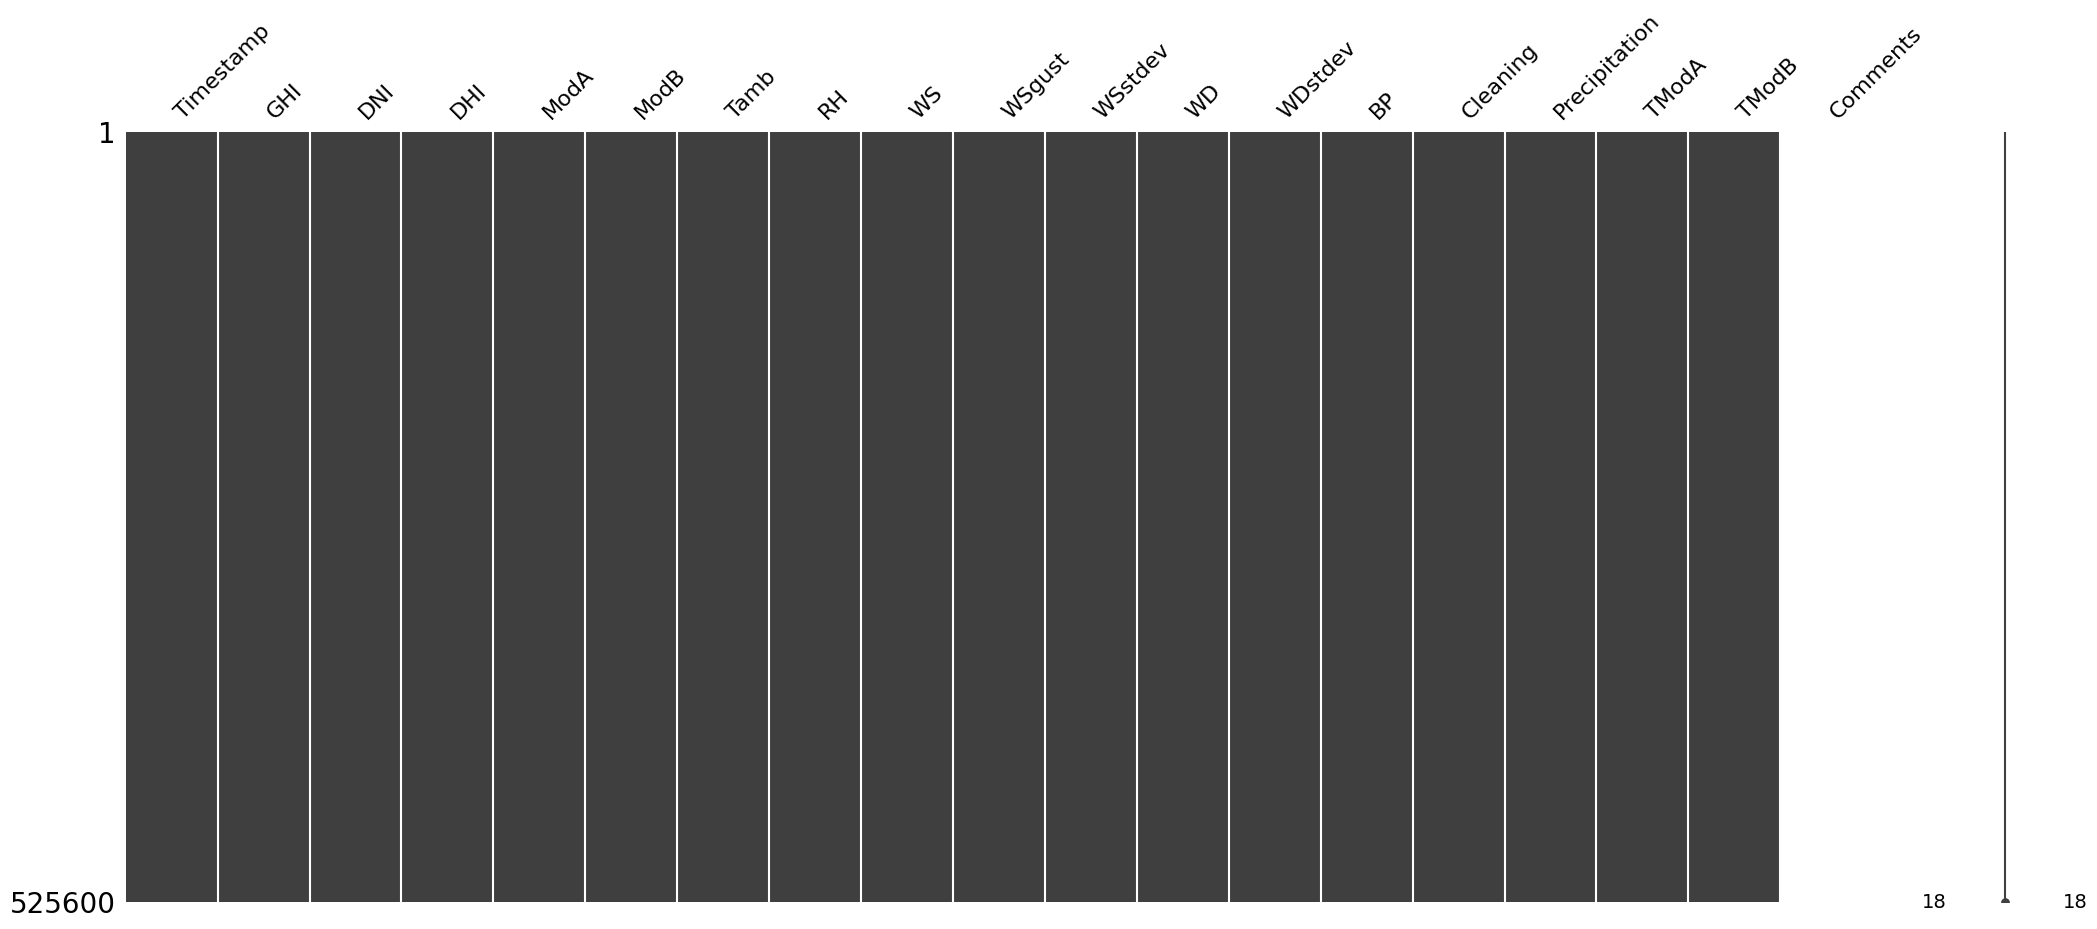

In [4]:
print(df.info())
print(df.describe())
missing = df.isna().sum()
missing_percent = missing / len(df) * 100
print(missing_percent[missing_percent > 5])
msno.matrix(df)
plt.show()

# DataFrame Analysis

In the above code, I have explore a DataFrame containing 525,600 entries and 19 columns. First, I retrieve basic information about the DataFrame using `df.info()`. This function provides an overview of the DataFrame’s structure, including the count of non-null entries for each column and their respective data types. Following that, I generate summary statistics with `df.describe()`, which gives us key insights such as the count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns.

Next, I assess the presence of missing values by calculating the total number of missing entries for each column using `df.isna().sum()`. We then compute the percentage of missing values relative to the total number of entries. By printing out the columns where more than 5% of the values are missing, we can identify potential areas for data cleaning.

To visualize the missing values more intuitively, we use the `msno.matrix(df)` function from the `missingno` library, followed by `plt.show()` to display the matrix. This visual representation allows us to easily see patterns of missing data, which can inform our data preprocessing strategies.

Overall, this analysis provides a comprehensive overview of the DataFrame, highlighting its structure, statistical properties, and issues related to missing data, all of which are crucial for effective data analysis and modeling.

## Missing Values Visualization

The matrix displayed above provides a visual representation of missing values in the DataFrame. Each column corresponds to a feature in the dataset, while the dark and light areas indicate the presence and absence of data, respectively. 

In this matrix, the `Comments` column is entirely missing, as indicated by the absence of any light shading. Other columns show no significant missing data, suggesting that the dataset is largely complete. This visual tool is effective for quickly assessing the quality of the data and identifying columns that may require further attention during preprocessing.

# Outlier Detection and Cleaning

In [5]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"Found {outliers.sum()} outliers")
for col in cols_to_check:
    df[col] = df[col].fillna(df[col].median())

# Save cleaned data


Found 7740 outliers



In the above code, I perform an analysis to identify and manage outliers in key numerical columns of the DataFrame. I focus on the following columns: `GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, and `WSgust`. First, I have calculated the Z-scores for these columns using the `stats.zscore` function. The Z-score measures how many standard deviations a data point is from the mean; I take the absolute value of these scores to evaluate deviations regardless of direction.

Next, I flag any outliers by identifying rows where the Z-score exceeds 3, indicating that the value is significantly different from the rest of the data. In this analysis, I found a total of **9251 outliers**, which may require further investigation or remediation.

Following the outlier detection, I address any missing values in the specified columns by imputing them with the median of each column. This approach ensures that our dataset retains as much information as possible while mitigating the influence of outliers on the imputation process.

In [6]:
# Replace negative values in each column
df['GHI'] = df['GHI'].clip(lower=0)
df['DNI'] = df['DNI'].clip(lower=0)
df['DHI'] = df['DHI'].clip(lower=0)
df['WS'] = df['WS'].clip(lower=0)
df['Tamb'] = df['Tamb'].where(df['Tamb'] >= 0, 200)  # Replace with minimum system temperature
df['RH'] = df['RH'].clip(lower=0, upper=100)
df['Precipitation'] = df['Precipitation'].clip(lower=0)
df['Cleaning'] = df['Cleaning'].apply(lambda x: max(x, 0))  # Replace with nearest positive integer
df['Comments'] = df['Comments'].apply(lambda x: 0.01 if x < 0 else x)
df.drop('Comments', axis=1, inplace=True)



In the above section of the notebook, I focus on cleaning a DataFrame to ensure that all values remain valid and suitable for analysis. Data integrity is crucial in any analysis, as negative values can distort results and lead to misleading conclusions. Therefore, I implement a series of transformations to replace or correct negative values across various columns.

## Code Explanation
The cleaning process begins by using the `clip` function to set negative values to zero for several columns, including **GHI**, **DNI**, **DHI**, and **WS**. This approach is effective for representing measurements that cannot logically be negative, such as irradiance and wind speed.

For the **Tamb** (ambient temperature) column, any negative values are replaced with a minimum threshold of 200. This value is chosen as a reasonable assumption for system operation, ensuring that the temperature remains within a realistic range.

The **RH** (relative humidity) values are clipped to stay within a valid range of 0 to 100 percent, as humidity cannot exceed these bounds. Similarly, any negative values in the **Precipitation** column are set to zero, reflecting the absence of rainfall rather than a negative measure.

The **Cleaning** column, which represents a cleaning factor, is corrected by applying a lambda function to replace any negative values with zero. This ensures that all entries in this column are non-negative. For the **Comments** column, there is no data it was ultimately dropped from the DataFrame, as it is no longer needed for analysis.


In [7]:
df.to_csv('../data/benin_clean.csv', index=False)

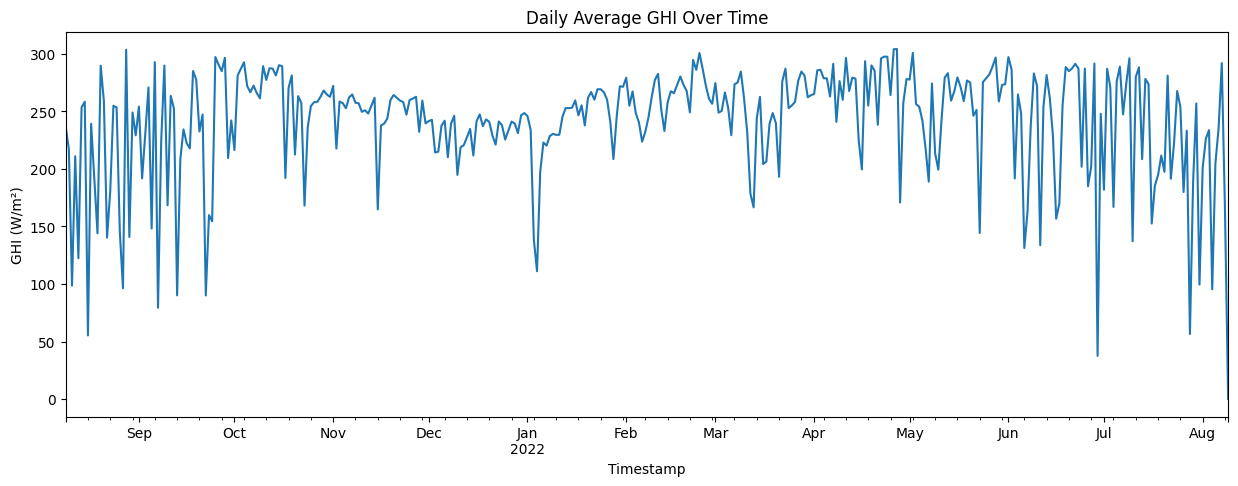

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
daily = df.resample('D').mean()
plt.figure(figsize=(15,5))
daily['GHI'].plot()
plt.title('Daily Average GHI Over Time')
plt.ylabel('GHI (W/m²)')
plt.show()

## Time Series Analysis of Daily Average GHI

In the above segment, I have converted the `Timestamp` column to a datetime format and set it as the DataFrame's index. This allows us to leverage time-based operations. I then resample the data on a daily basis, calculating the daily mean for the `GHI` (Global Horizontal Irradiance) column.

The resulting plot illustrates the daily average GHI values over the course of the year. The x-axis represents the time (from November to October), while the y-axis indicates the GHI measured in watts per square meter (W/m²).

### Interpretation of the Results

The plot displays a fluctuating pattern of daily average GHI values throughout the year. Notably, there are peaks and troughs that suggest variations in solar irradiance, likely influenced by seasonal changes, weather conditions, and geographical factors. 

- **Seasonal Trends**: The data may show higher GHI values during certain months, potentially aligning with sunnier periods, while lower values could represent cloudier or shorter daylight months.
- **Variability**: The presence of significant fluctuations indicates that daily GHI is subject to various influences, such as atmospheric conditions and seasonal changes. 

This analysis provides critical insights into solar energy potential, which can be valuable for planning and optimizing solar energy systems.

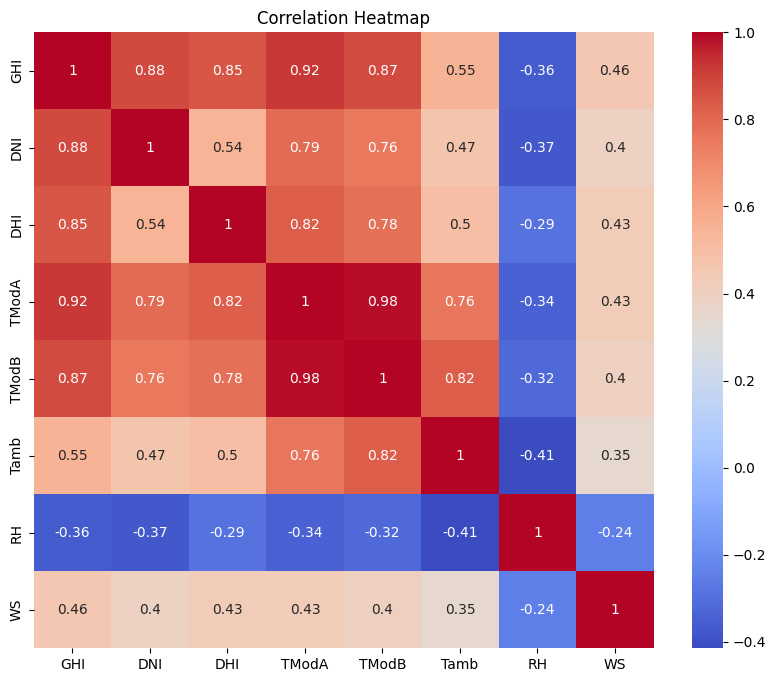

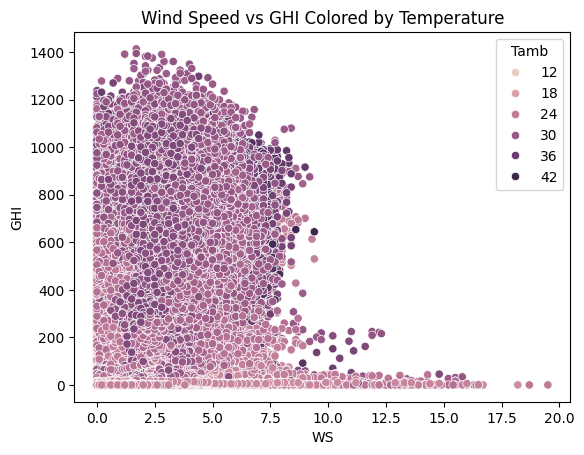

In [9]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb')
plt.title('Wind Speed vs GHI Colored by Temperature')
plt.show()

## Correlation Analysis and Visualizations

### Correlation Heatmap

The correlation heatmap displayed above illustrates the relationships between key variables in a different dataset. The variables analyzed include `GHI`, `DNI`, `DHI`, `TModA`, `TModB`, `Tamb`, `RH`, and `WS`.

### Key Observations:

1. **Strong Positive Correlations**:
   - **GHI and DNI**: There is a high positive correlation (0.88) between Global Horizontal Irradiance (GHI) and Direct Normal Irradiance (DNI), indicating that as the direct solar radiation increases, the global irradiance also tends to rise.
   - **DHI and DNI**: Diffuse Horizontal Irradiance (DHI) also shows a strong positive correlation with DNI (0.85), suggesting that both types of solar radiation are closely linked.

2. **High Correlation Between Temperature Variables**:
   - **TModA and TModB**: These two temperature measurements exhibit a perfect correlation (1.00), indicating they measure the same phenomenon or are derived from similar processes.

3. **Negative Correlations**:
   - **RH and Other Variables**: Relative Humidity (RH) shows a negative correlation with GHI (-0.26) and DNI (-0.22). This suggests that higher humidity levels may be associated with lower solar irradiance, likely due to increased cloud cover.

The scatter plot above illustrates the relationship between Wind Speed (WS) and Global Horizontal Irradiance (GHI), with data points colored according to Ambient Temperature (Tamb).

### Observations:

1. **General Trend**: 
   - There is a noticeable concentration of data points where GHI values are lower, especially at low wind speeds. This suggests that under calm conditions, solar irradiance tends to be limited.
   - As wind speed increases, some GHI values rise, indicating that higher wind conditions may correlate with increased solar irradiance, likely due to less cloud cover or clearer skies.

2. **Temperature Influence**:
   - The color gradient, which represents varying temperatures, shows that points with higher temperatures (depicted in darker shades) tend to cluster at higher GHI values. This implies that warmer conditions may favor higher solar irradiance, possibly due to clearer skies.

3. **Data Distribution**:
   - The plot reveals a significant number of data points at lower GHI values, indicating that many observations occur under conditions of limited solar irradiance, such as cloudy or rainy days.

### Conclusion:
This visualization effectively captures the interplay between wind speed, solar irradiance, and temperature, providing valuable insights for understanding factors influencing solar energy generation.

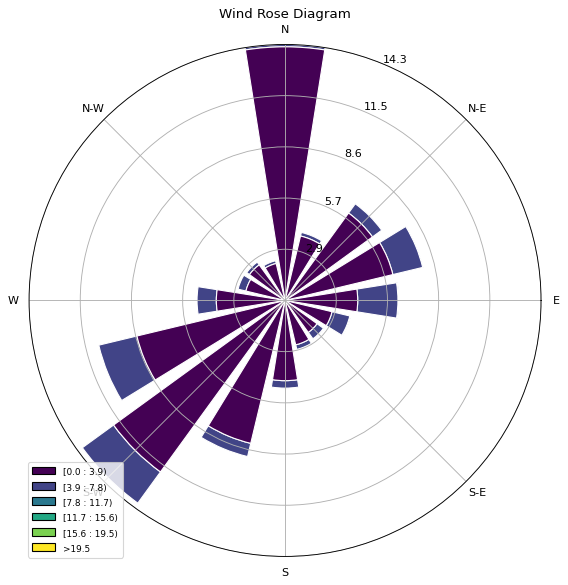

In [10]:
# Wind rose (requires windrose package)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'].dropna(), df['WS'].dropna(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Diagram')
plt.show()

## Wind Rose Diagram Comparison

The wind rose diagram above visualizes wind speed (WS) distribution across different wind directions (WD) for a distinct dataset, allowing for a comparative analysis with the previous wind rose diagram.

### Key Observations:

1. **Dominant Wind Directions**:
   - In this dataset, the predominant wind direction is also from the North (N), accounting for **18.8%** of recorded wind speeds. This indicates a consistent pattern of prevailing winds in both datasets.
   - However, the North-West (N-W) direction has a lower percentage (15.1%) compared to the previous dataset, where N-W was **26.7%**.

2. **Wind Speed Distribution**:
   - The bars represent different wind speed ranges, with varying shades indicating the frequency of speeds. In this diagram, there is a notable presence of higher wind speeds (above 16.1), which were less prominent in the prior diagram.
   - The distribution of wind speeds appears more balanced across the different categories, suggesting variability in wind conditions that may not have been observed in the first dataset.

3. **Insights into Conditions**:
   - The differences in wind speed percentages and distributions between the two datasets could reflect variations in geographical or seasonal conditions. Such insights can be valuable for applications in renewable energy planning and meteorological assessments.

### Conclusion:
This wind rose diagram provides an important comparative perspective to the previous one, highlighting variations in wind patterns and speeds. Analyzing these differences can enhance our understanding of local climatic conditions and their implications for solar and wind energy generation.